### Redes Neuronales Tipo MLP en Machine Learning y su Aplicación en Data Analytics Empresarial

# Índice

- [🔠 Problemas de clasificación](#class)
- [📈 Problemas de regresión](#reg)
- [🧠 Redes neuronales profundas con capas Dropout](#drop)

**¿Qué es una red neuronal tipo MLP?**

Las redes neuronales de perceptrones multicapa (MLP, por sus siglas en inglés) son un tipo de modelo de aprendizaje supervisado en Machine Learning. Están compuestas por múltiples capas de nodos (neuronas artificiales) que transforman los datos de entrada mediante funciones de activación no lineales, lo que les permite aprender relaciones complejas entre las variables.

**Tipos de modelos MLP**

* **MLPClassifier:** Se utiliza cuando la variable objetivo es categórica. Por ejemplo, para predecir si un cliente comprará o no un producto.
* **MLPRegressor:** Se utiliza cuando la variable objetivo es numérica. Por ejemplo, para predecir el precio de una vivienda o el nivel de humedad de un producto.

**¿Cómo funcionan?**

Las redes MLP funcionan ajustando los pesos de las conexiones entre neuronas mediante un proceso de entrenamiento (backpropagation), minimizando el error entre la salida predicha y el valor real. Gracias a sus múltiples capas ocultas, pueden modelar relaciones no lineales complejas.

**Ventajas de las Redes Neuronales MLP:**

* **Capacidad para modelar relaciones no lineales complejas.**
* **Flexibilidad:** Pueden aplicarse tanto a problemas de clasificación como de regresión.
* **Generalización:** Con entrenamiento adecuado y regularización, pueden generalizar bien sobre datos nuevos.

**Aplicaciones en Data Analytics Empresarial:**

* **Predicción de demanda:** Predecir ventas o consumo futuro de productos.
* **Clasificación de clientes:** Identificar grupos de clientes con alta probabilidad de compra.
* **Detección de fraudes:** Clasificar transacciones como legítimas o sospechosas.
* **Estimación de precios:** Predecir valores de propiedades o productos en base a características.

**En resumen, las redes MLP ofrecen una alternativa potente y flexible para resolver problemas predictivos complejos en contextos empresariales.**

## Ejemplos de Uso de MLPClassifier y MLPRegressor

**MLPClassifier:**

* Clasificación de correos electrónicos como spam o no spam.
* Predicción de abandono de clientes (churn).
* Clasificación de productos según su categoría.

**MLPRegressor:**

* Predicción del precio de viviendas.
* Estimación del tiempo de entrega en logística.
* Predicción de humedad en alimentos según sus características visuales.

## Variables Predictoras y Objetivo en Modelos MLP

En Machine Learning, las **variables predictoras** son las entradas del modelo, mientras que la **variable objetivo** es lo que se desea predecir. Las redes MLP pueden utilizar tanto variables numéricas como categóricas (previa codificación).

**Ejemplo de clasificación (MLPClassifier):**

* **Variables predictoras:** edad, ingresos, historial de compras.
* **Variable objetivo:** clase de riesgo crediticio.

**Ejemplo de regresión (MLPRegressor):**

* **Variables predictoras:** número de habitaciones, ubicación, antigüedad de la vivienda.
* **Variable objetivo:** precio estimado de la vivienda.

## Caso: Predicción de Humedad en Fotografías de Granos de Arroz con MLP

La predicción del nivel de humedad en granos es fundamental para garantizar la calidad, seguridad y rentabilidad del producto.

**Datos:**

* **Variables predictoras:** Histogramas extraídos de imágenes de arroz (inputs visuales).
* **Variable objetivo:** Nivel de humedad \$y \in {10,11,12,13,14,15,16}\$.

**Tratamiento del problema:**

* Puede considerarse un problema de clasificación si se trata cada valor de humedad como una clase (MLPClassifier).
* También puede abordarse como regresión (MLPRegressor) y luego redondear la salida a la clase más cercana.

**Importancia del problema:**

* Mejora el secado artificial.
* Optimiza almacenamiento y transporte.
* Reduce pérdidas por deterioro o plagas.
* Mejora la clasificación y precio de comercialización.

En este contexto, las redes neuronales permiten modelar relaciones complejas entre las características visuales y la variable objetivo, con alta capacidad de generalización para nuevos lotes de grano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [2]:
# Descargar imagen
!wget https://raw.githubusercontent.com/marsgr6/ml-online/main/data/H14_093304.jpg

# Nuestra imagen está en escala de grises
img = Image.open('H14_093304.jpg')  # cargar imagen
img.size  # tamaño de la imagen

--2025-06-20 22:37:20--  https://raw.githubusercontent.com/marsgr6/ml-online/main/data/H14_093304.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3439002 (3.3M) [image/jpeg]
Saving to: ‘H14_093304.jpg’

H14_093304.jpg      100%[===================>]   3.28M  --.-KB/s    in 0.09s   

2025-06-20 22:37:21 (34.8 MB/s) - ‘H14_093304.jpg’ saved [3439002/3439002]



(4128, 3096)

In [3]:
# obtenemos el centro de la imagen
w, h = (np.array(img.size) // 2)
w, h

(np.int64(2064), np.int64(1548))

In [4]:
# Recorte de la imagen, a partir del centro
# nuevas dimensiones (tamaño de recorte)
cw, ch = 660, 660  # nuevo tamaño

# recorte a partir del centro mitad nueveo alto/ancho
box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2
box  # caja de recorte

(np.int64(702), np.int64(444), np.int64(1362), np.int64(1104))

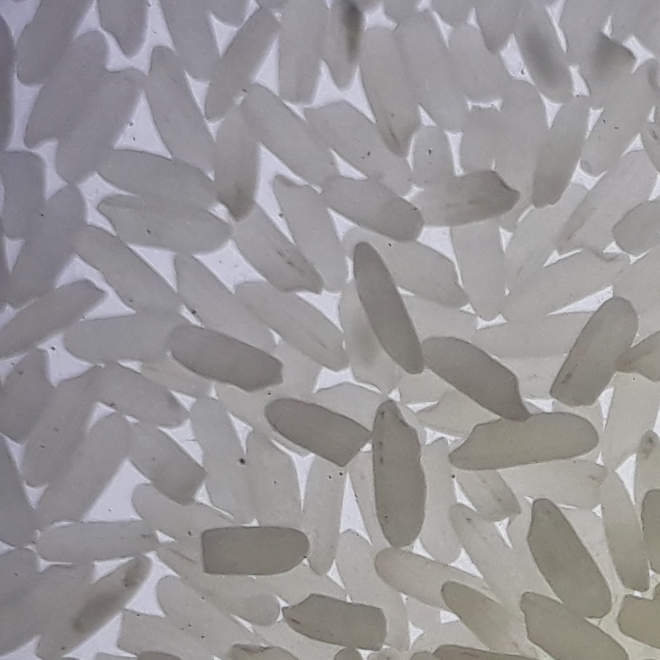

In [5]:
img_cropped = img.crop(box)
img_cropped

### Histograma de la imagen: variables de entrada (predictores)

- El histograma se visualiza como una gráfica de barras, donde el eje $x$ representa los valores de intensidad y el eje Y representa el número de píxeles (frecuencia) para cada valor de intensidad.

- El número de bins es un parámetro que se puede elegir, pero un valor común es 256 **(panel izquierdo)**, lo que significa que se crea un bin para cada valor de intensidad posible.

- Los valores de intensidad de los píxeles, que normalmente van de 0 a 255 en imágenes de 8 bits, se dividen en un número determinado de intervalos o "bins", en nuestro ejemplo se usan 44 bines **(panel izquierdo)**.

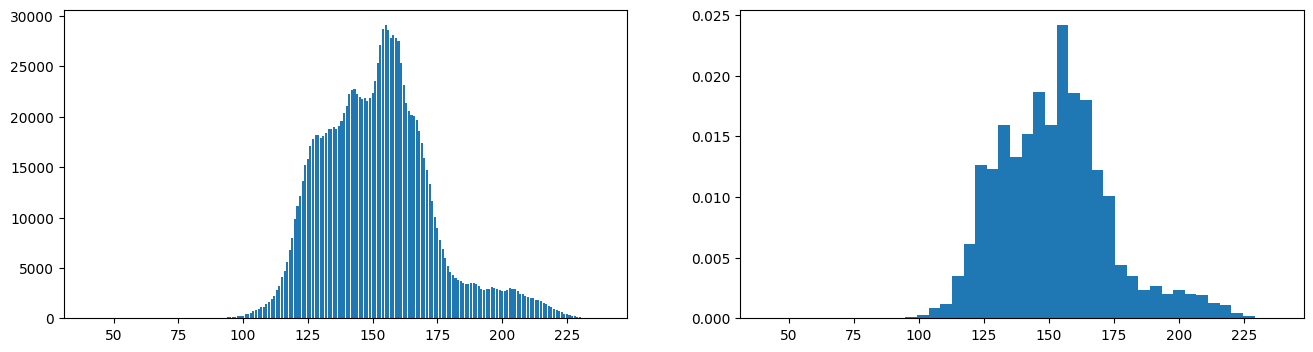

In [6]:
# Transformar array 2D a 1D
pixels = np.array(img_cropped).flatten()
# Construir diagrama de barras con 256 bins
# En una imagen en escala de grises cada pixel contiente un valor entre 0 y 255
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(*np.unique(pixels, return_counts=True))

# Construir histograma con 44 bins
plt.subplot(1,2,2)
h = plt.hist(pixels, bins=44, density=True)

### Input data para el MLP y variable objetivo (target)

El modelo **MLP** utilizará como **entrada (`X`)** los **histogramas de imágenes en escala de grises** obtenidas a partir de fotografías de granos de arroz. Cada histograma se calcula utilizando la altura de los **44 bines**, lo que representa la distribución de intensidades de gris en cada imagen. Por lo tanto, la matriz de entrada `X` tendrá una forma de `(n_muestras, 44)`.

La **variable objetivo (`y`)** es el **nivel de humedad** del grano correspondiente a cada imagen, un valor entero que varía en el rango de **10 a 16**. Dependiendo del enfoque, este problema puede ser tratado como:

* **Clasificación multiclase**, usando `MLPClassifier`, donde cada clase representa un nivel de humedad discreto.
* **Regresión**, usando `MLPRegressor`, donde la predicción continua `ŷ` se redondea al entero más cercano para estimar la clase de humedad.

In [7]:
# Las alturas de histograma serán nuestro vector de entrada X
h[0], len(h[0])  # h[0] altura del histograma

(array([5.12741629e-07, 5.12741629e-07, 3.41827753e-07, 1.02548326e-06,
        8.54569382e-07, 3.41827753e-07, 1.88005264e-06, 2.73462202e-06,
        8.03295220e-06, 1.38440240e-05, 3.07644978e-05, 4.73431438e-05,
        1.28869063e-04, 2.84400690e-04, 8.17822899e-04, 1.21143756e-03,
        3.46835530e-03, 6.10282179e-03, 1.26272881e-02, 1.23071664e-02,
        1.59009725e-02, 1.32940231e-02, 1.51592063e-02, 1.86865269e-02,
        1.59177221e-02, 2.41721786e-02, 1.85884223e-02, 1.79866345e-02,
        1.22408518e-02, 1.00483686e-02, 4.42991676e-03, 3.49399238e-03,
        2.36818267e-03, 2.68915893e-03, 2.03660975e-03, 2.36647353e-03,
        1.96192039e-03, 1.90962074e-03, 1.26766822e-03, 1.07641559e-03,
        4.38052265e-04, 2.10053154e-04, 4.35830385e-05, 7.34929669e-06]),
 44)

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,humidity
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.012158,0.044333,0.354619,0.098181,0.124926,0.136753,0.008118,0.000009,0.000000,10
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.014039,0.018889,0.141064,0.151785,0.089501,0.119041,0.040481,0.001417,0.000000,10
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.018064,0.023848,0.141680,0.120306,0.108169,0.121783,0.027558,0.000676,0.000000,10
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.029847,0.022650,0.035885,0.074686,0.087595,0.107312,0.082734,0.014666,0.000054,10
4,0.0,0.0,0.0,0.000009,0.0,0.000009,0.000027,0.000018,0.000045,0.00009,...,0.015860,0.043084,0.339896,0.143472,0.115284,0.128973,0.035604,0.001162,0.000000,10


In [9]:
data.iloc[:,:-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.000014,0.000028,0.000065,0.000128,0.000214,0.000966,0.005213,0.001067,0.000116,0.000171,...,0.027661,0.031278,0.087876,0.190515,0.112837,0.103457,0.116627,0.032822,0.001430,0.000002
std,0.000114,0.000201,0.000394,0.000689,0.001124,0.007024,0.035924,0.006590,0.000315,0.000339,...,0.023420,0.031301,0.091787,0.095035,0.032029,0.020023,0.048207,0.023983,0.002411,0.000012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007444,0.007756,0.011540,0.028937,0.037259,0.043105,0.007829,0.000086,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012980,0.014053,0.027827,0.125638,0.089162,0.090107,0.082844,0.010775,0.000047,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,...,0.020033,0.019908,0.046835,0.171026,0.108850,0.102421,0.123879,0.030658,0.000638,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000081,0.000188,...,0.028884,0.037133,0.108597,0.247400,0.133112,0.114255,0.151436,0.049145,0.001721,0.000000
max,0.001474,0.002317,0.003440,0.004835,0.009255,0.090649,0.377729,0.075797,0.002356,0.001916,...,0.141751,0.253941,0.415862,0.537803,0.236872,0.181483,0.234865,0.116686,0.018232,0.000134


### Dimensión de nuestro datos de entrada:

- $X$: 218 observaciones (imágenes), 44 columnas (variables), cada uno de los bines de las imágenes.
- Etiquetas $y$: tantas como observaciones, 218, con valores únicos $y \in \{10,11, \dots, 16 \}$, cada nivel de humedad.

In [10]:
data.iloc[:,:-1].shape

(218, 44)

## Visualización del dataset

Este heatmap visualiza el **dataset completo de histogramas de imágenes en escala de grises**, usado como entrada para el modelo MLP.

### Ejes:

* **218 histogramas** en el eje horizontal (uno por imagen), organizados por clase de humedad (`H=10` a `H=16`).
* **44 bins de intensidad** en el eje vertical (de abajo hacia arriba), representando los niveles de gris de cada imagen.
* Cada histograma tiene 44 bins, y se visualiza en un arreglo de tamaño (44 × 218) para cada imagen/observación.


### Ejes:

* **Eje horizontal (x):** Cada columna representa un histograma individual de una imagen, con los grupos claramente separados por clase de humedad (`H=10` a `H=16`), marcados por líneas verticales color cian.
* **Eje vertical (y):** Cada fila representa un bin de intensidad de gris (del bin 0 al bin 43).

### Colores:

* El color de cada celda indica el **valor del bin** después de normalizar el histograma por densidad, es decir, **los valores integran 1 en cada histograma**, y la altura representa la densidad relativa de aparición de cada rango de grises, no la frecuencia absoluta ni relativa directa.


### Características observadas:

* Las **clases de humedad** están delimitadas con líneas verticales cian y etiquetadas en la parte superior (`H=10` a `H=16`).
* Las **líneas horizontales amarillas** marcan el **bin 12** y el **bin 42**, destacando el rango donde se concentra la mayor parte de la información útil.
* Se nota que **los bins extremos (cerca de 0 o 44)** contienen **muy poca información**, es decir, las imágenes tienen pocos valores de gris muy oscuros o muy claros.
* En cambio, los **bins intermedios (del 12 al 42)** muestran mayor densidad y variación, lo que indica que ahí se concentra la señal relevante para modelar el nivel de humedad.
* Las clases con mayor número de muestras (como `H=13` o `H=14`) presentan patrones más definidos en la distribución del histograma.

### Conclusión:

Este heatmap es útil para visualizar cómo varían las distribuciones de intensidad de gris según la humedad del grano. La **información relevante para el modelo MLP** se encuentra principalmente en los **bins 12 a 42**, mientras que las **colas (bins bajos y altos)** podrían ser candidatas a ser descartadas o recibir menor ponderación en modelos más complejos.

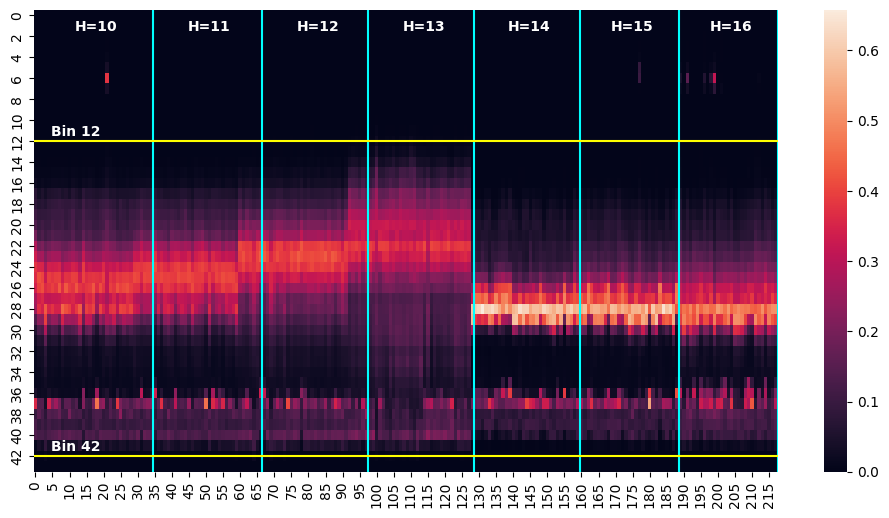

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:-1].T)
t = list(data.humidity.unique())
x = list(data.humidity.value_counts().cumsum())
c = list(data.humidity.value_counts())
plt.vlines(x,
           data.humidity.nunique()*[0],
           data.shape[0]*data.humidity.nunique(), colors="cyan")
plt.hlines([12.5, 42.5], [0, 0], [218, 218], colors="yellow")
[plt.text(v[0]-v[2]//2-6, 2, 'H='+v[1], c='white', fontweight="bold") for v in zip(x, t, c)];
plt.text(5, 12, 'Bin 12', c='white', fontweight="bold");
plt.text(5, 42, 'Bin 42', c='white', fontweight="bold");
plt.show()

## Definición de un Problema de Clasificación Multi-Clase Balanceado
<a name="class"></a>

Un problema de clasificación multi-clase balanceado se refiere a una tarea de aprendizaje automático donde se busca clasificar datos en diferentes categorías, teniendo en cuenta que cada categoría tiene un número similar de ejemplos.

**En este tipo de problemas, la distribución de las clases es uniforme o casi uniforme, a diferencia de los problemas desbalanceados donde una o pocas clases son dominantes.**

**Características:**

* **Múltiples clases:** El objetivo es clasificar los datos en más de dos categorías.
* **Balance de clases:** Cada clase tiene un número similar de ejemplos, evitando el sesgo hacia las clases mayoritarias.
* **Importancia del balance:** El balance de clases es crucial para obtener un modelo preciso y confiable, ya que un modelo entrenado con un conjunto de datos desbalanceado podría tender a clasificar la mayoría de los ejemplos en la clase dominante.

En un problema de clasificación multi-clase desbalanceado, un modelo sin técnicas de balanceo puede:

* **Predominar hacia las clases mayoritarias:** Ignorando las características de las clases minoritarias y generando un alto error en su clasificación.
* **Sesgo en las métricas de evaluación:** Las métricas tradicionales como la precisión general pueden ser engañosas, ya que el modelo podría tener un alto rendimiento para las clases mayoritarias pero un bajo rendimiento para las minoritarias.

**Técnicas de Balanceo:**

Para abordar un problema de clasificación multi-clase balanceado, se pueden aplicar diferentes técnicas, como:

* **Submuestreo:** Eliminar aleatoriamente ejemplos de las clases mayoritarias para igualar el número de ejemplos en cada clase.
* **Sobremuestreo:** Duplicar aleatoriamente ejemplos de las clases minoritarias para aumentar su número.
* **Generación sintética de datos:** Crear nuevos ejemplos de las clases minoritarias utilizando técnicas de aprendizaje automático.
* **Algoritmos específicos:** Algunos algoritmos de clasificación, como el Random Forest o el Support Vector Machine (SVM), pueden ser más adecuados para manejar problemas desbalanceados.

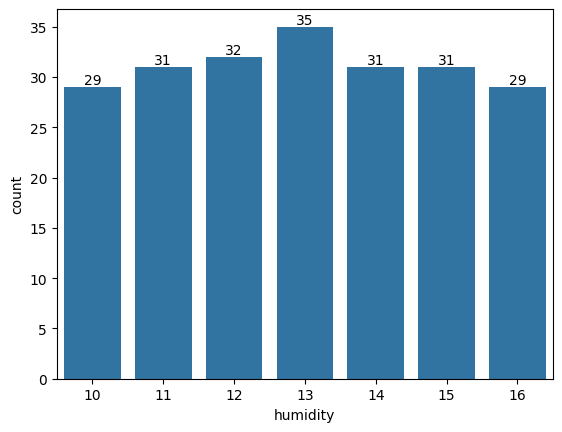

In [12]:
ax = sns.countplot(x='humidity', data=data)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='humidity', ylabel='22'>

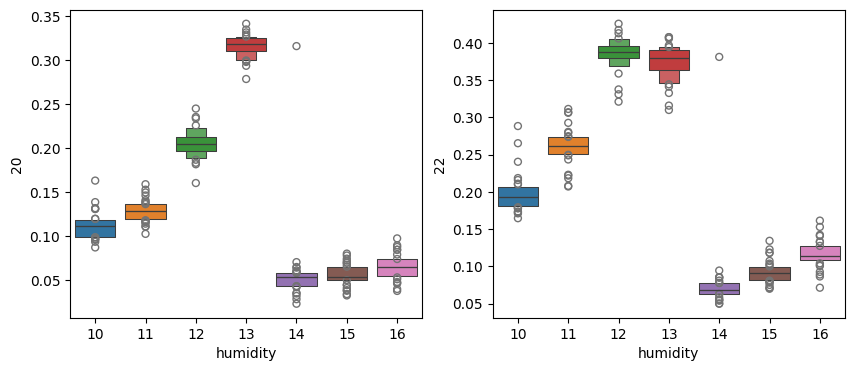

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxenplot(data=data, x='humidity', y='20', hue='humidity')
plt.subplot(1,2,2)
sns.boxenplot(data=data, x='humidity', y='22', hue='humidity')

<Axes: xlabel='22', ylabel='Density'>

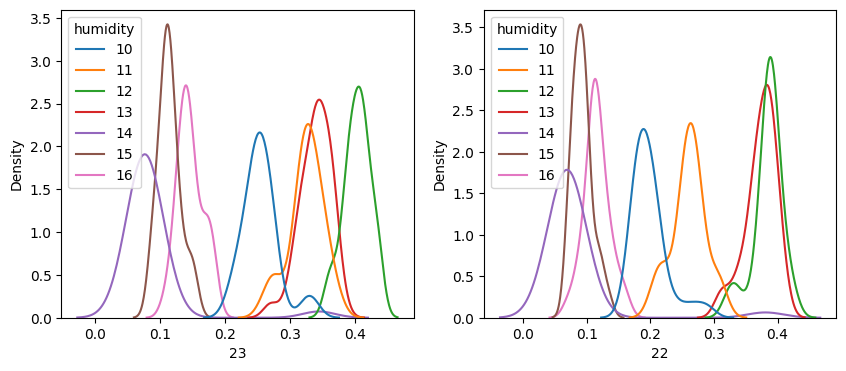

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data, hue='humidity', x='23')
plt.subplot(1,2,2)
sns.kdeplot(data=data, hue='humidity', x='22')

<Axes: xlabel='22', ylabel='23'>

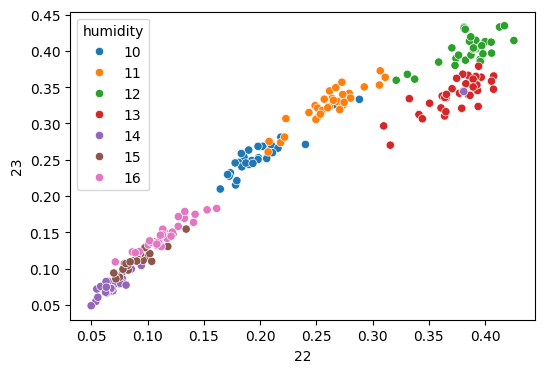

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='22', y='23', hue='humidity')

- Podemos observar separabilidad entre las clases a partir de los histogramas ($X$).
  - Sin embargo puede ser convienente utilizar técnicas de reducción de dimensionalidad para visualizar la separación de clases.

Vea: https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb

### Pasos a seguir en un proyecto de Machine Learning (ML)

Un proyecto de ML exitoso no se limita a entrenar un modelo con una red neuronal. Requiere una planificación y ejecución cuidadosa en cada etapa para garantizar resultados confiables y adaptables a la realidad del negocio.

**1. Definición del objetivo:**

* Plantear un problema claro y conciso que se quiera resolver a través de ML.
* Establecer los objetivos específicos del proyecto, las métricas de éxito y el impacto esperado en el negocio.
* Considerar las limitaciones de tiempo, recursos y datos disponibles.

**2. Recopilación y preparación de datos:**

* Identificar las fuentes de datos relevantes, tanto internas como externas.
* **Asegurar la calidad de los datos, verificando su limpieza, completitud y consistencia.
* Preparar los datos para el entrenamiento del modelo, incluyendo limpieza, transformación y normalización.
* Dividir los datos en conjuntos de entrenamiento, validación y prueba para una evaluación precisa del modelo.

**3. Elección del modelo:**

* Seleccionar el algoritmo de ML adecuado para la naturaleza del problema y el tipo de datos disponibles.
* Considerar diferentes tipos de modelos como regresión, clasificación, clustering o redes neuronales.
* Ajustar los hiperparámetros del modelo para optimizar su rendimiento.

**4. Entrenamiento del modelo:**

* Entrenar el modelo con el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de validación.
* Ajustar el modelo y los hiperparámetros para mejorar su precisión y generalización.
* Utilizar técnicas como la validación cruzada para evitar el sobreajuste del modelo.

**5. Evaluación del modelo:**

* Evaluar el rendimiento del modelo final en el conjunto de prueba.
* Analizar las métricas de evaluación como la precisión, la sensibilidad y la especificidad.
* Identificar posibles sesgos o errores en el modelo y tomar medidas correctivas.

**6. Implementación y monitoreo:**

* Implementar el modelo en producción para su uso real en el negocio.
* Monitorizar el rendimiento del modelo en producción y realizar ajustes periódicos según sea necesario.
* Garantizar la seguridad y la ética en el uso del modelo.

**7. Documentación y comunicación:**

* Documentar el proceso completo del proyecto, incluyendo los objetivos, los datos, el modelo y la evaluación.
* Comunicar los resultados del proyecto a las partes interesadas de manera clara y concisa.
* Compartir las lecciones aprendidas y las mejores prácticas para futuros proyectos de ML.

Cada proyecto de ML es único y puede requerir adaptaciones a estos pasos generales. Es importante ser flexible y adaptable a medida que se avanza en el proyecto, y siempre tener en cuenta el objetivo final de resolver un problema real del negocio.

### Ejemplo: Detección de humedad en granos de arroz usando redes neuronales MLP

**Redes Neuronales MLP (Multilayer Perceptron):**

Una red neuronal MLP es un modelo de aprendizaje automático supervisado capaz de realizar tanto tareas de clasificación como de regresión. Está compuesta por múltiples capas de neuronas artificiales conectadas entre sí, donde cada capa transforma los datos de entrada mediante funciones de activación no lineales.

**Funcionamiento:**

1. La red se entrena con un conjunto de datos etiquetado, utilizando retropropagación para minimizar el error entre la predicción y el valor real.
2. Las neuronas de la capa de entrada reciben los datos (en este caso, histogramas de intensidades de grises de las imágenes).
3. Las capas ocultas procesan los datos mediante funciones no lineales, permitiendo modelar relaciones complejas.
4. La capa de salida entrega una predicción final, que puede ser una clase (clasificación) o un valor continuo (regresión).

**Ventajas:**

* Capacidad de modelar relaciones no lineales complejas.
* Adaptable tanto a clasificación como a regresión.
* Puede entrenarse eficientemente con conjuntos de datos medianos utilizando GPUs.

**Desventajas:**

* Difícil de interpretar en comparación con modelos más simples.
* Requiere ajuste cuidadoso de hiperparámetros.
* Puede ser sensible al desbalanceo de clases.

**En resumen:**

* Las redes MLP son modelos potentes y versátiles para problemas predictivos complejos.
* Ofrecen una alternativa no lineal y flexible frente a modelos como los árboles de decisión o regresión lineal.

### Pasos

**1. Definición del objetivo:**

* Detectar humedad en granos de arroz a partir de fotografías obtenidas desde una cámara de teléfono celular.

**2. Recopilación y preparación de datos:**

* Describir el conjunto de datos: Imágenes de granos de arroz y sus etiquetas de humedad.
* Procesamiento: Conversión a escala de grises y extracción de histogramas de 44 bins por imagen.
* Visualización: Usar técnicas como PCA o t-SNE para entender la separabilidad de clases.
* Detalles:

  * **Entrada:** Numérica (vector de 44 bins por imagen).
  * **Salida:** Nivel de humedad \$y \in {10,11,12,13,14,15,16}\$.
  * Dimensiones del dataset: 218 muestras x 44 características.

**3. Elección del modelo:**

* Desarrollar dos variantes de MLP:

  * **MLPClassifier:** Para predecir etiquetas de humedad como clases discretas.
  * **MLPRegressor:** Para predecir valores continuos de humedad y redondear al entero más cercano.

* Para el modelo de regresión:

  * Si \$\hat y < 10\$, ajustar \$\hat y = 10\$.
  * Si \$\hat y > 16\$, ajustar \$\hat y = 16\$.

**4. Entrenamiento y 5. Evaluación del modelo:**

* División del conjunto de datos en entrenamiento, validación y prueba.
* Ajuste de hiperparámetros:

  * Arquitectura de la red (número de capas y neuronas).
  * Funciones de activación.
  * Algoritmo de optimización.
* Validación cruzada (por ejemplo, K-Fold estratificado).
* Métricas:

  * **Clasificación:** accuracy, matriz de confusión, F1-score.
  * **Regresión:** RMSE, MAE, R2.
* Visualizaciones:

  * Gráficos de predicciones vs etiquetas reales.
  * Mapas de calor de activaciones (opcional).

**Referencias:**

* Determination of Moisture in Rice Grains Based on Visible Spectrum Analysis:

  * [https://www.mdpi.com/2073-4395/12/12/3021](https://www.mdpi.com/2073-4395/12/12/3021)

### Crear datos de entrada $X$ y salida $y$

In [16]:
# Seleccionar entrada X y las etiquetas de salida y
X = data.iloc[:,:-1]  # todas las columnas menos la etiquieta y
y = data['humidity']  # etiqueta y: humedad

### **Primera prueba con MLPClassifier**

Entrenamos y evaluamos con todos los datos (solo a modo exploratorio):

Los pasos generales a seguir en `sklearn` para construir un modelo `MLPClassifier` son:

* **Importar el modelo:**

```python
from sklearn.neural_network import MLPClassifier
```

* **Definir el modelo:**

```python
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
```

* **Ajustar (entrenar) el modelo:**

```python
clf.fit(X, y)
```

* **Realizar predicciones:**

```python
y_pred = clf.predict(X)
```

* **Evaluar el modelo:**

```python
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
```

Classification Report:
              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



Text(0.5, 1.0, 'Matriz de Confusión - MLPClassifier')

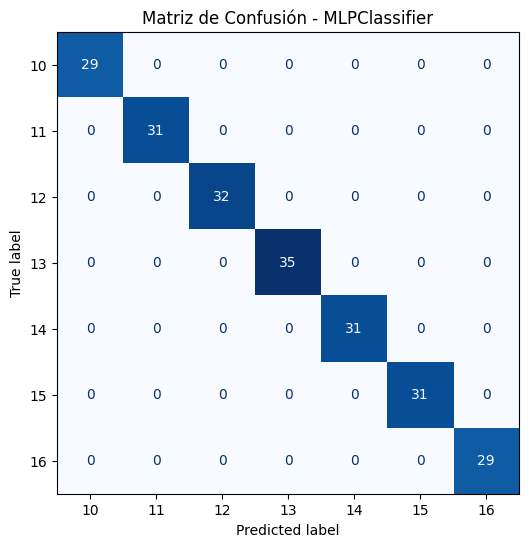

In [17]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar datos (X: histogramas, y: humedad entre 10 y 16) ---

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir y entrenar el modelo
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf.fit(X_scaled, y)

# Predicción
y_pred = clf.predict(X_scaled)

# Evaluación textual
print("Classification Report:")
print(classification_report(y, y_pred))

# Matriz de confusión
cm = confusion_matrix(y, y_pred, labels=sorted(np.unique(y)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(np.unique(y)))

# Visualización
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Matriz de Confusión - MLPClassifier")

### Matriz de confusión

Una **matriz de confusión** es una herramienta fundamental en el aprendizaje automático para evaluar el rendimiento de un modelo de **clasificación**. Esta matriz resume las **predicciones** del modelo en comparación con las **etiquetas reales** de los datos, permitiendo visualizar y comprender los errores del modelo de forma clara y concisa.

**Estructura de la matriz:**

- **Filas**: Representan las **clases reales** del conjunto de datos.
- **Columnas**: Representan las **clases predichas** por el modelo.

Cada celda de la matriz contiene el número de instancias que fueron clasificadas en una clase específica por el modelo, en comparación con su clase real.

**Ejemplo:**

Supongamos que tenemos un problema de clasificación binaria con dos clases: **Perro** y **Gato**. La matriz de confusión para un modelo con 100 instancias podría verse así:


| |Perro (Predicho) | Gato (Predicho) | Total|
|------- | -------- | -------- | --------|
|Perro (Real) | 80      | 20      | 100|
|Gato (Real)  | 10      | 90      | 100|
|Total        | 90      | 110     | 200|


**Interpretación de la matriz:**

- **Casilla diagonal principal:** Contiene las **predicciones correctas**. En este caso, 80 perros fueron correctamente clasificados como perros y 90 gatos fueron correctamente clasificados como gatos.
- **Casillas fuera de la diagonal principal:** Contienen los **errores del modelo**. En este caso, 20 perros fueron clasificados erróneamente como gatos y 10 gatos fueron clasificados erróneamente como perros.

**Beneficios de la matriz de confusión:**

- Visualiza el rendimiento del modelo de forma clara y concisa.
- Permite identificar los errores del modelo y las áreas donde se puede mejorar.
- Ayuda a seleccionar el mejor modelo entre diferentes opciones.

### Métricas de Evaluación en Clasificación: Precisión, Recall, F1-Score

La evaluación del rendimiento de un modelo de clasificación es crucial para entender su eficacia y limitaciones. Existen diversas métricas utilizadas para este fin, entre las que destacan:

**1. Precisión (Precision):**

- Proporciona la proporción de **clasificaciones positivas que fueron correctas**. Se calcula dividiendo el número de **verdaderos positivos (TP)** entre el número total de predicciones positivas (TP + FP).

$$
Precisión = TP / (TP + FP)
$$

- Un valor alto de precisión indica que el modelo es bueno para no etiquetar incorrectamente como positivas las instancias negativas.
- Sin embargo, la precisión puede ser engañosa en problemas desbalanceados, donde hay clases minoritarias.

**2. Recall (Sensibilidad):**

- Mide la proporción de **instancias realmente positivas que fueron correctamente clasificadas**. Se calcula dividiendo el número de **verdaderos positivos (TP)** entre el número total de instancias positivas reales (TP + FN).

$$
Recall = TP / (TP + FN)
$$

- Un valor alto de recall indica que el modelo es bueno para identificar correctamente las instancias positivas.
- Similar a la precisión, el recall puede ser engañoso en problemas desbalanceados, donde las clases minoritarias pueden tener un recall bajo a pesar de que el modelo las clasifique bien.

**3. F1-Score:**

- La **F1-Score** es una métrica equilibrada que combina la precisión y el recall en una sola medida. Se calcula como la media armónica ponderada de la precisión y el recall.

$$
F1 = 2 * (Precision * Recall) / (Precision + Recall)
$$

- Un valor alto de F1-Score indica que el modelo tiene un buen equilibrio entre la precisión y el recall.
- La F1-Score es una métrica particularmente útil en problemas desbalanceados, ya que tiene en cuenta la importancia de clasificar correctamente tanto las clases mayoritarias como las minoritarias.

**Resumen:**

* La **Precisión** se preocupa por las predicciones positivas que son correctas.
* El **Recall** se preocupa por las instancias positivas que se identifican correctamente.
* La **F1-Score** combina ambos aspectos en una sola métrica equilibrada.

La elección de la métrica más adecuada depende del contexto específico del problema. En general, si las clases están relativamente equilibradas y ambos tipos de error (clasificar mal los positivos y clasificar mal los negativos) son igualmente costosos, entonces la F1-Score puede ser una buena opción. Si un tipo de error tiene un costo mayor que el otro, entonces podría ser más relevante utilizar la precisión o el recall dependiendo del tipo de error que se quiera minimizar.

**Calculamos la precisión, recall y F1:**


| |Perro (Predicho) | Gato (Predicho) | Total|
|------- | -------- | -------- | --------|
|Perro (Real) | 80      | 20      | 100|
|Gato (Real)  | 10      | 90      | 100|
|Total        | 90      | 110     | 200|

**Precisión:**

* **Perro:**
    * TP = 80
    * FP = 10
    * Precisión = TP / (TP + FP) = 80 / (80 + 10) = 0.8889
* **Gato:**
    * TP = 90
    * FP = 20
    * Precisión = TP / (TP + FP) = 90 / (90 + 20) = 0.8182

**Recall:**

* **Perro:**
    * TP = 80
    * FN = 20
    * Recall = TP / (TP + FN) = 80 / (80 + 20) = 0.8
* **Gato:**
    * TP = 90
    * FN = 10
    * Recall = TP / (TP + FN) = 90 / (90 + 10) = 0.9

**F1:**

* **Perro:**
    * F1 = 2 * (Precisión * Recall) / (Precisión + Recall) = 2 * (0.8889 * 0.8) / (0.8889 + 0.8) = 0.8475
* **Gato:**
    * F1 = 2 * (Precisión * Recall) / (Precisión + Recall) = 2 * (0.8182 * 0.9) / (0.8182 + 0.9) = 0.8571

**Interpretación de los resultados:**

* **Precisión:**
    * Perro: El modelo tiene una precisión del 88.89% al clasificar perros. Es decir, de cada 100 perros predichos, 88.89 son correctos.
    * Gato: El modelo tiene una precisión del 81.82% al clasificar gatos. Es decir, de cada 100 gatos predichos, 81.82 son correctos.
* **Recall:**
    * Perro: El modelo identifica el 80% de los perros reales.
    * Gato: El modelo identifica el 90% de los gatos reales.
* **F1:**
    * Perro: El F1 score de 0.8475 indica un buen equilibrio entre precisión y recall para la clasificación de perros.
    * Gato: El F1 score de 0.8571 indica un buen equilibrio entre precisión y recall para la clasificación de gatos.


### Resultado para humedad

En nuestro ejemplo un F1-Score de 1 significa que el modelo clasifica perfectamente todas las instancias, sin cometer ningún error.

Esto implica que:

La precisión del modelo es del 100%, lo que significa que todas las instancias predichas como positivas realmente lo son.
El recall del modelo también es del 100%, lo que significa que todas las instancias positivas reales fueron correctamente clasificadas.

**¿Se ha generalizado bien?**

Un F1-Score perfecto en el conjunto de entrenamiento no garantiza que el modelo se generalice bien a nuevos datos que no ha visto antes. Es crucial evaluar el modelo en un conjunto de test independiente para asegurar su rendimiento en situaciones reales.

### Train test split

Un **train test split** es una técnica fundamental en el aprendizaje automático para dividir un conjunto de datos en dos subconjuntos:

* **Conjunto de entrenamiento:** Se utiliza para entrenar el modelo. Este conjunto debe ser lo suficientemente grande como para que el modelo aprenda las características relevantes de los datos, pero no tan grande como para que el entrenamiento sea demasiado lento.
* **Conjunto de prueba:** Se utiliza para evaluar el rendimiento del modelo después de que ha sido entrenado. Este conjunto debe ser independiente del conjunto de entrenamiento para que la evaluación sea imparcial.

La división del conjunto de datos en dos partes permite:
  - Evitar el **sobreajuste**, que es un problema que ocurre cuando el modelo aprende demasiado las características del conjunto de entrenamiento y no se generaliza bien a nuevos datos.
  -  Evaluar el rendimiento del modelo de forma imparcial: utilizar un conjunto de prueba independiente, la evaluación del rendimiento del modelo será más precisa y confiable.
  - Seleccionar el mejor modelo: Si se está entrenando y evaluando multiple modelos, es necesario utilizar un conjunto de prueba independiente para comparar el rendimiento de los diferentes modelos y seleccionar el mejor.
  - Optimizar los hiperparámetros del modelo: Los hiperparámetros son los parámetros que controlan el proceso de entrenamiento del modelo. Se pueden utilizar diferentes técnicas para optimizar los hiperparámetros del modelo, como la búsqueda en cuadrícula o la búsqueda aleatoria.

**Existen diferentes técnicas para realizar un train test split:**

* **División aleatoria:** Es la técnica más simple, donde se dividen los datos aleatoriamente en dos conjuntos.
* **División estratificada:** Se utiliza cuando las clases en el conjunto de datos están desbalanceadas. Esta técnica divide los datos en dos conjuntos manteniendo la misma proporción de clases en ambos.
* **Validación cruzada:** Es una técnica más avanzada que divide los datos en múltiples conjuntos y entrena y evalúa el modelo en cada uno de ellos.

- La línea de código:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
```

divide un conjunto de datos en dos conjuntos, un conjunto de **entrenamiento** y un conjunto de **prueba**, de forma **estratificada**. Esto significa que se asegura que la distribución de clases en ambos conjuntos de prueba y entrenamiento sea similar a la distribución de clases en el conjunto de datos original.


- **X**: Representa la matriz de características del conjunto de datos. Contiene información numérica o categórica que describe las instancias (filas).
- **y**: Representa la matriz de etiquetas del conjunto de datos. Contiene la variable objetivo o predicción para cada instancia.
- **X_train**: Matriz de características del conjunto de entrenamiento.
- **X_test**: Matriz de características del conjunto de prueba.
- **y_train**: Matriz de etiquetas del conjunto de entrenamiento.
- **y_test**: Matriz de etiquetas del conjunto de prueba.
- **test_size=0.3**, 70% datos de entrenamiento, 30% datos de prueba.
- **stratify=y**: Este es el argumento clave que habilita la **estratificación**. Indica que la división del conjunto de datos debe mantener la misma distribución de clases que el conjunto de datos original. Esto es particularmente importante cuando se trabaja con **conjuntos de datos desbalanceados**, donde hay una clase dominante y varias clases minoritarias.

- El argumento `stratify` solo funciona con variables objetivo categóricas (clases).

              precision    recall  f1-score   support

          10       1.00      0.57      0.73         7
          11       0.73      1.00      0.84         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         9
          14       0.89      1.00      0.94         8
          15       0.88      0.88      0.88         8
          16       1.00      0.86      0.92         7

    accuracy                           0.91        55
   macro avg       0.93      0.90      0.90        55
weighted avg       0.93      0.91      0.91        55



Text(0.5, 1.0, 'Matriz de Confusión - MLPClassifier')

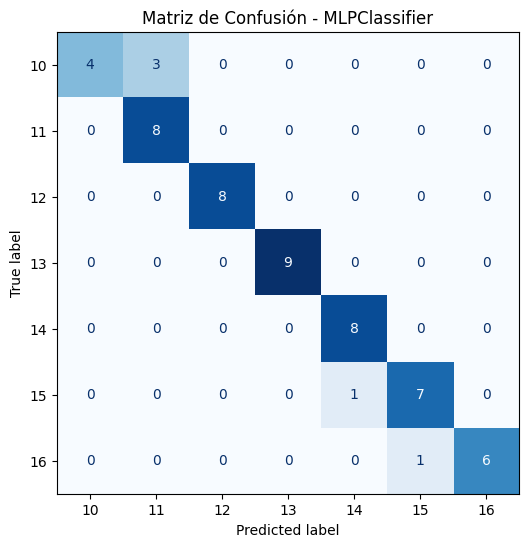

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# División de los datos en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Escalado de los datos (muy importante para MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definición y entrenamiento del modelo
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicción sobre el conjunto de prueba
y_pred = clf.predict(X_test_scaled)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=sorted(np.unique(y)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(np.unique(y)))

# Visualización
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Matriz de Confusión - MLPClassifier")

- **Discuta la matriz de confusión** y las métricas de evaluación del modelo.

- La clasificación no es perfecta en este caso para nuestro conjunto de prueba. Este es un resultado más realista de lo que observaremos en la implementación del modelo.

- Vamos a realizar un ejercicio de validación cruzada en conjunto con la optimización de hiper-parámetros del modelo RF.

### Cross validation

La **validación cruzada con ajuste de hiperparámetros** es una técnica avanzada en el aprendizaje automático que combina dos estrategias para optimizar el rendimiento de un modelo:

**1. Validación cruzada (CV):**

La **validación cruzada** divide el conjunto de datos en múltiples subconjuntos (**folds**) y entrena y evalúa el modelo en cada uno de ellos. Esto permite obtener una estimación más precisa del rendimiento del modelo en comparación con la evaluación en un solo conjunto de prueba.

![CV](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/1920px-K-fold_cross_validation_EN.svg.png)

**2. Ajuste de hiperparámetros (HPO):**

Los **hiperparámetros** son los parámetros que controlan el proceso de entrenamiento del modelo, como la tasa de aprendizaje o el número de iteraciones. El **ajuste de hiperparámetros** busca encontrar la mejor configuración de estos parámetros para optimizar el rendimiento del modelo.

### Búsqueda aleatoria y búsqueda en cuadrícula para ajuste de hiperparámetros:

**Búsqueda aleatoria:**

* **Procedimiento:**
    * Muestrea aleatoriamente un conjunto de configuraciones de hiperparámetros de un espacio de búsqueda predefinido.
    * Entrena el modelo con cada configuración de hiperparámetros.
    * Selecciona la configuración que produce el mejor rendimiento en el conjunto de validación.
* **Ventajas:**
    * Es más eficiente que la búsqueda en cuadrícula, especialmente cuando hay muchos hiperparámetros.
    * Puede explorar un espacio de búsqueda más amplio y encontrar configuraciones de hiperparámetros que la búsqueda en cuadrícula podría pasar por alto.
* **Desventajas:**
    * No es tan precisa como la búsqueda en cuadrícula.
    * Puede ser difícil encontrar la mejor distribución de probabilidad para el muestreo aleatorio.

**Búsqueda en cuadrícula:**

* **Procedimiento:**
    * Define un conjunto discreto de valores para cada hiperparámetro.
    * Entrena el modelo con todas las combinaciones posibles de valores de hiperparámetros.
    * Selecciona la configuración que produce el mejor rendimiento en el conjunto de validación.
* **Ventajas:**
    * Es más precisa que la búsqueda aleatoria.
    * Es más fácil de implementar.
* **Desventajas:**
    * Puede ser computacionalmente costosa, especialmente cuando hay muchos hiperparámetros.
    * No explora el espacio de búsqueda tan bien como la búsqueda aleatoria.

**Resumen:**

* La búsqueda aleatoria es una buena opción cuando hay muchos hiperparámetros o cuando se desea explorar un espacio de búsqueda amplio.
* La búsqueda en cuadrícula es una buena opción cuando hay pocos hiperparámetros y se desea obtener la mejor configuración posible.

**Consideraciones adicionales:**

* El tamaño del espacio de búsqueda.
* El tiempo y los recursos disponibles.
* El tipo de modelo de aprendizaje automático.
* La complejidad del problema.

**Recomendación:**

Se recomienda probar ambas técnicas y comparar sus resultados para elegir la mejor opción para cada caso particular.


![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/0_yDmmJmvRowl0cSN8.png)


**Combinación de ambas técnicas (CV y HPO):**

La **validación cruzada con ajuste de hiperparámetros** combina ambas estrategias para encontrar la mejor configuración de hiperparámetros para un modelo. El proceso se realiza de la siguiente manera:

1. Se divide el conjunto de datos en **folds**.
2. Para cada fold:
    * Se entrena el modelo con diferentes configuraciones de hiperparámetros.
    * Se evalúa el rendimiento del modelo en el conjunto de validación correspondiente al fold.
3. Se selecciona la configuración de hiperparámetros que obtuvo el mejor rendimiento promedio en todos los folds.
4. Se entrena el modelo final con la configuración de hiperparámetros seleccionada y se evalúa en un conjunto de prueba independiente.

**Ventajas de la validación cruzada con ajuste de hiperparámetros:**

- Reduce el riesgo de **sobreajuste**, que es un problema que ocurre cuando el modelo se ajusta demasiado al conjunto de entrenamiento y no se generaliza bien a nuevos datos.
- Permite encontrar la mejor configuración de hiperparámetros para un modelo, lo que mejora su rendimiento.
- Obtiene una estimación más precisa del rendimiento del modelo en nuevos datos.

### Número de folds

El número de folds a usar en la validación cruzada (cross validation) depende de varios factores, incluyendo:

**1. Tamaño del conjunto de datos:**

* Si tiene un **conjunto de datos pequeño** (menos de 1000 ejemplos), se recomienda usar un número menor de folds (por ejemplo, 5 o 10).
* Si tiene un **conjunto de datos grande** (más de 1000 ejemplos), puede usar un número mayor de folds (por ejemplo, 10, 20 o 30).

**2. Varianza del modelo:**

* Si su modelo tiene una **alta varianza** (es decir, es susceptible a cambios en el conjunto de entrenamiento), se recomienda usar un número mayor de folds para obtener una estimación más precisa del error.
* Si su modelo tiene una **baja varianza** (es decir, es robusto a cambios en el conjunto de entrenamiento), un número menor de folds puede ser suficiente.

**3. Tiempo de computación:**

* La validación cruzada con un número mayor de folds toma más tiempo de computación.
* Si tiene recursos computacionales limitados, puede usar un número menor de folds.

**En general, se recomienda usar un número de folds entre 5 y 30.**

**Algunos valores comunes son:**

* **5 folds:** Es un buen punto de partida para la mayoría de los conjuntos de datos.
* **10 folds:** Es un buen equilibrio entre precisión y tiempo de computación.
* **20 folds:** Se puede usar para obtener una estimación más precisa del error, especialmente con conjuntos de datos grandes.

**Es importante tener en cuenta que no existe un número "óptimo" de folds que funcione para todos los casos.**

**La mejor manera de determinar el número de folds a usar es experimentar con diferentes valores y observar cómo afecta el rendimiento del modelo.**

**Algunos consejos adicionales para elegir el número de folds:**

* Si tiene un conjunto de datos pequeño, use un número menor de folds.
* Si tiene un conjunto de datos grande, use un número mayor de folds.
* Si su modelo tiene una alta varianza, use un número mayor de folds.
* Si su modelo tiene una baja varianza, un número menor de folds puede ser suficiente.
* Si tiene recursos computacionales limitados, use un número menor de folds.
* Experimente con diferentes valores de folds y observe cómo afecta el rendimiento del modelo.

**Recursos adicionales:**

- Ver: https://marsgr6.github.io/presentations/SK_Part_4_Cross-Validation_and_Hyperparameter_Tuning.html#/
- Validación cruzada: [https://scikit-learn.org/stable/modules/cross_validation.html](https://scikit-learn.org/stable/modules/cross_validation.html)

## Hiperparámetros de un modelo MLP (Multilayer Perceptron)

En un modelo de red neuronal MLP, los hiperparámetros que se pueden optimizar incluyen:

**1. Tamaño y estructura de la red (hidden\_layer\_sizes):** Define el número de capas ocultas y el número de neuronas en cada capa. Por ejemplo, `(100,)` indica una sola capa con 100 neuronas, y `(100, 50)` dos capas con 100 y 50 neuronas respectivamente. Redes más grandes pueden capturar patrones complejos pero también pueden sobreajustar.

**2. Función de activación (activation):** Controla la no linealidad entre capas. Las opciones comunes son `'relu'`, `'tanh'` y `'logistic'`. `'relu'` suele ser la más eficiente en la mayoría de los casos.

**3. Algoritmo de optimización (solver):** Determina el método para actualizar los pesos. Opciones comunes: `'adam'`, `'lbfgs'`, `'sgd'`. `'adam'` es el más utilizado por su buen rendimiento general.

**4. Tasa de aprendizaje inicial (learning\_rate\_init):** Controla cuán rápido se actualizan los pesos. Valores muy grandes pueden hacer que la red no converja; valores muy pequeños pueden hacer que el entrenamiento sea lento.

**5. Regularización L2 (alpha):** Ayuda a prevenir el sobreajuste penalizando pesos grandes. Valores más altos aumentan la regularización.

**6. Máximo número de iteraciones (max\_iter):** Límite de épocas para el entrenamiento. Si el modelo no converge dentro de este límite, se detiene.

**7. Estrategia de aprendizaje (learning\_rate):** Define cómo cambia la tasa de aprendizaje durante el entrenamiento. Por ejemplo: `'constant'`, `'invscaling'` o `'adaptive'` (solo con `'sgd'`).

**8. Tamaño del batch (batch\_size):** Número de ejemplos usados en cada actualización de pesos. Solo se aplica cuando el `solver='sgd'` o `'adam'`.

**9. Parámetros de parada temprana (early\_stopping, tol, n\_iter\_no\_change):** Se usan para detener el entrenamiento si no hay mejora significativa durante varias iteraciones consecutivas.

**10. Peso de clases (class\_weight):** Solo aplica en clasificación. Puede ser `'balanced'` para manejar desbalance de clases.

En general, no existe una configuración única de hiperparámetros que funcione mejor para todos los conjuntos de datos. Es importante realizar una búsqueda sistemática (como GridSearchCV o RandomSearchCV) para encontrar la combinación que mejor se adapte a su problema específico.

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)

# Seleccionar entrada X y las etiquetas de salida y
X = data.iloc[:,:-1]  # todas las columnas menos la etiquieta y
y = data['humidity']  # etiqueta y: humedad

# Espacio de búsqueda de hiperparámetros para MLPClassifier dentro de un pipeline
params_MLP = {
    'mlpclassifier__hidden_layer_sizes': [(50), (100,), (200,), (500,)],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__learning_rate_init': [0.0001, 0.001, 0.01],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__max_iter': [1000]
}

# Pipeline con escalado + MLPClassifier
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=42)
)

# GridSearch con validación cruzada
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=params_MLP,
    scoring='accuracy',   # Métrica: accuracy (clasificación)
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Entrenamiento con todos los datos
grid_search.fit(X, y)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mejor precisión promedio en validación cruzada
print("\nAccuracy promedio (CV) del mejor modelo:")
print(grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados:
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate_init': 0.001, 'mlpclassifier__max_iter': 1000}

Accuracy promedio (CV) del mejor modelo:
0.9215644820295983


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert GridSearchCV results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract relevant hyperparameters and accuracy
results_df['hidden_layer_sizes'] = results_df['param_mlpclassifier__hidden_layer_sizes'].astype(str)
results_df['activation'] = results_df['param_mlpclassifier__activation'].astype(str)
results_df['alpha'] = results_df['param_mlpclassifier__alpha']
results_df['learning_rate_init'] = results_df['param_mlpclassifier__learning_rate_init']
results_df['mean_test_score'] = results_df['mean_test_score']  # accuracy

# Optional: sort for smoother plots
results_df.sort_values(by=['learning_rate_init', 'alpha'], inplace=True)

# Show first few rows (optional)
results_df[['hidden_layer_sizes', 'activation', 'alpha', 'learning_rate_init', 'mean_test_score']].head()

,hidden_layer_sizes,activation,alpha,learning_rate_init,mean_test_score
0,50,tanh,0.0001,0.0001,0.857294
3,"(100,)",tanh,0.0001,0.0001,0.893975
6,"(200,)",tanh,0.0001,0.0001,0.903171
9,"(500,)",tanh,0.0001,0.0001,0.903277
36,50,relu,0.0001,0.0001,0.871036


{'mlpclassifier__activation': 'relu',
 'mlpclassifier__alpha': 0.0001,
 'mlpclassifier__hidden_layer_sizes': (100,),
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_iter': 1000}

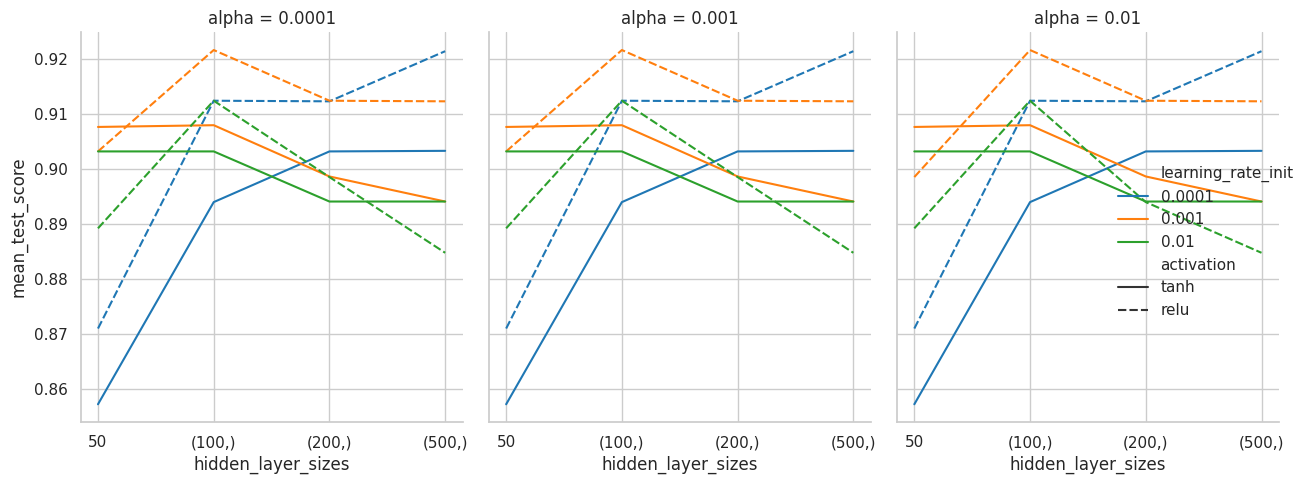

In [21]:
# Graficar usando seaborn.relplot con columnas por tipo de activación
sns.set(style="whitegrid")
g = sns.relplot(
    data=results_df,
    x="hidden_layer_sizes", y="mean_test_score",
    hue="learning_rate_init", style="activation", col="alpha",
    kind="line", palette="tab10",
    height=5, aspect=0.75
)
plt.tight_layout()
grid_search.best_params_

- Note que la evaluación del resultado para el cross-validation en la búsqueda de rejilla (grid search) la realizamos para el **accuracy promedio** sobre los conjuntos de prueba `mean_test_score`.

Scores (Accuracy por fold): [0.93181818 0.95454545 0.97727273 0.88372093 0.90697674]
Accuracy promedio: 0.9308668076109935


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(max_iter=1000, random_state=42))])

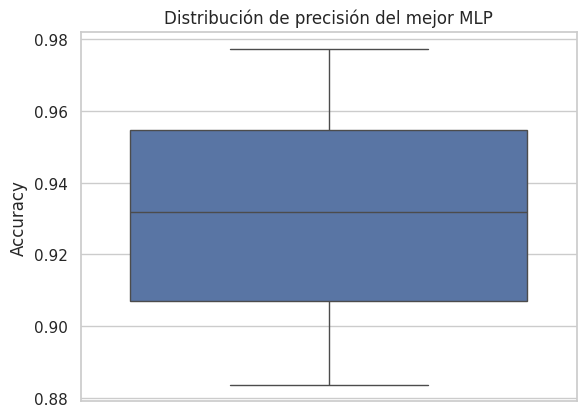

In [22]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Supone que ya ejecutaste GridSearchCV y tienes gs_MLP listo
best_MLP = grid_search.best_estimator_

# Define tu método de validación cruzada, por ejemplo con 5 folds estratificados
from sklearn.model_selection import StratifiedKFold
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el desempeño del mejor modelo con validación cruzada
scores_class = cross_val_score(best_MLP, X, y, cv=cv_method, scoring='accuracy')

# Mostrar resultados
print("Scores (Accuracy por fold):", scores_class)
print("Accuracy promedio:", scores_class.mean())

# Visualización
sns.boxplot(y=scores_class)
plt.title("Distribución de precisión del mejor MLP")
plt.ylabel("Accuracy")

# Mostrar el modelo entrenado final
best_MLP

## Importancia de características en MLP

A diferencia de modelos como Random Forest, un **MLP (Multilayer Perceptron)** no ofrece directamente una métrica de "feature importance" basada en reducción de impureza. Sin embargo, es posible analizar la **importancia relativa de las características** mediante enfoques como:

* **Pesos de las conexiones en la red**: Se puede examinar la magnitud de los pesos entre la capa de entrada y la primera capa oculta. Características con pesos más altos (en valor absoluto) suelen tener mayor impacto en la activación de las neuronas y, por tanto, en la salida final.
* **Perturbación o permutación de características**: Consiste en evaluar cómo cambia la precisión del modelo al alterar o reordenar una característica específica. Una caída significativa en el desempeño indica una característica relevante.
* **Técnicas de interpretación post hoc**: Métodos como **SHAP (SHapley Additive exPlanations)** o **LIME (Local Interpretable Model-agnostic Explanations)** permiten estimar la contribución de cada característica a la predicción de forma local o global.

Es importante destacar que, en MLP, la interpretación de importancia de características es **menos directa e intuitiva** que en árboles de decisión, debido a la naturaleza distribuida y no lineal de las representaciones aprendidas.

En nuestro caso, el análisis posterior del modelo entrenado sugiere que ciertos bines del histograma específicamente los **bins centrales como 25, 26 y 40** muestran mayor separabilidad entre las clases de humedad. Estos bines, por tanto, podrían tener una mayor influencia en la predicción del modelo y deberían considerarse prioritarios en análisis futuros o en procesos de selección de variables.

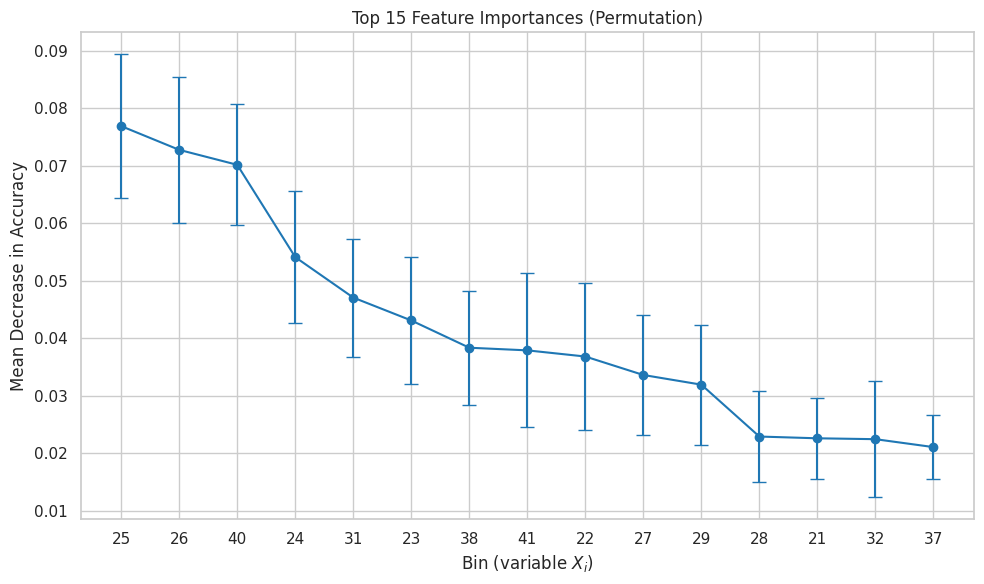

In [23]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold

# Cargar el conjunto de datos desde una URL
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')

# Convertir la columna 'humidity' en string para clasificación multiclase
data['humidity'] = data['humidity'].astype(str)

# Separar variables predictoras (X) y variable objetivo (y)
X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data['humidity']   # Columna objetivo: humedad en niveles discretos

# Construir un pipeline con los mejores hiperparámetros encontrados en GridSearchCV
best_mlp = make_pipeline(
    StandardScaler(),  # Escalado estándar para que las variables tengan media 0 y varianza 1
    MLPClassifier(     # Clasificador MLP (red neuronal multicapa)
        activation='relu',                 # Función de activación ReLU
        alpha=0.0001,                      # Regularización L2
        hidden_layer_sizes=(100,),        # Una capa oculta con 100 neuronas
        learning_rate_init=0.001,         # Tasa de aprendizaje inicial
        max_iter=1000,                    # Número máximo de iteraciones (épocas)
        random_state=42                   # Semilla para reproducibilidad
    )
)

# Entrenar el modelo con todos los datos disponibles
best_mlp.fit(X, y)

# Calcular la importancia de características mediante permutación
perm = permutation_importance(
    estimator=best_mlp,        # Modelo entrenado
    X=X, y=y,                  # Conjunto de datos completo
    n_repeats=30,              # Número de repeticiones para estimar la variabilidad
    random_state=42,           # Semilla aleatoria para reproducibilidad
    n_jobs=-1                  # Usar todos los núcleos disponibles para acelerar el cálculo
)

# Organizar los resultados en un DataFrame para facilitar su análisis
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm.importances_mean,  # Disminución promedio en la precisión
    'Importance Std': perm.importances_std     # Desviación estándar de esa disminución
}).sort_values(by="Importance Mean", ascending=False)  # Ordenar de mayor a menor importancia

# Visualizar las 15 características más importantes con barras de error
plt.figure(figsize=(10, 6))
data=perm_df.head(15)
plt.errorbar(data['Feature'], data['Importance Mean'], yerr=data['Importance Std'], fmt='-o', capsize=5, color='tab:blue')
plt.title("Top 15 Feature Importances (Permutation)")
plt.ylabel("Mean Decrease in Accuracy")
plt.xlabel(r"Bin (variable $X_i$)")
plt.tight_layout()

## Importancia de las características

Este gráfico representa la **importancia de las características** del modelo MLP, calculada mediante **permutación**. La idea es observar cuánto disminuye la precisión del modelo cuando se desordena (permuta) cada característica, una por una.

* **Eje X:** Representa las características (en este caso, los bines del histograma en escala de grises, por ejemplo, bin 25, bin 26, etc.).
* **Eje Y:** Muestra la **disminución promedio de la precisión** del modelo cuando esa característica se permuta.
* **Puntos (círculos):** La media de la caída en precisión — es decir, cuánto afecta esa característica al desempeño.
* **Barras verticales:** La desviación estándar de esa caída en precisión, reflejan la **variabilidad** de la importancia cuando se repite el experimento (en este caso, 30 veces, **n_repeats=30**).

### 🔍 ¿Cómo interpretar el gráfico?

* **Mientras más alto** está un punto → **mayor impacto** tiene esa característica en la precisión del modelo.
* **Barras más largas** → mayor variabilidad: puede indicar que su efecto cambia dependiendo del subconjunto de datos.
* Las características **ubicadas más alto en el eje Y** (como los bins 25, 26, 40) son las más importantes en esta visualización.

> Esto sugiere que el modelo MLP depende más de esos bines para predecir correctamente el nivel de humedad.


### 📌 Ejemplos del gráfico:

* **Bins 25, 26 y 40** causan una caída de \~0.08 en la precisión cuando se permutan → son **altamente relevantes** para la predicción.
* **Bins 21, 32 y 37** tienen poca o nula influencia (\~0.02) → el modelo puede funcionar sin ellas casi igual.


> Este análisis puede ayudarte a:

   * Interpretar mejor cómo el modelo toma decisiones.
   * Seleccionar o eliminar variables poco relevantes.
   * Justificar decisiones técnicas en un informe o despliegue.

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Cargar datos
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)

# Separar variables independientes (X) y variable dependiente (y)
X = data.iloc[:, :-1]
y = data['humidity']

# Espacio de búsqueda para RandomizedSearchCV
params_MLP = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (200,), (300,), (100, 50)],
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['adam', 'sgd'],
    'mlpclassifier__alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'mlpclassifier__learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'mlpclassifier__max_iter': [1000],
    'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Pipeline de escalado + MLPClassifier
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=42)
)

# RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=params_MLP,
    n_iter=40,  # Número de combinaciones aleatorias a probar
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenar
random_search.fit(X, y)

# Resultados
print("🎯 Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("\n✅ Mejor precisión promedio en validación cruzada:")
print(random_search.best_score_)

# Convert results to DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sort by mean test score
results_df = results_df.sort_values(by="mean_test_score", ascending=False)

results_df.head()

Fitting 5 folds for each of 40 candidates, totalling 200 fits
🎯 Mejores hiperparámetros encontrados:
{'mlpclassifier__solver': 'adam', 'mlpclassifier__max_iter': 1000, 'mlpclassifier__learning_rate_init': 0.001, 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__alpha': 1e-05, 'mlpclassifier__activation': 'logistic'}

✅ Mejor precisión promedio en validación cruzada:
0.9169133192389006


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlpclassifier__solver,param_mlpclassifier__max_iter,param_mlpclassifier__learning_rate_init,param_mlpclassifier__learning_rate,param_mlpclassifier__hidden_layer_sizes,param_mlpclassifier__alpha,param_mlpclassifier__activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.267821,0.067580,0.006274,0.002476,adam,1000,0.0010,constant,"(50,)",0.00001,logistic,"{'mlpclassifier__solver': 'adam', 'mlpclassifi...",0.909091,1.000000,0.954545,0.837209,0.883721,0.916913,0.056277,1
29,0.184175,0.014994,0.004768,0.000138,adam,1000,0.0100,constant,"(100,)",0.00100,relu,"{'mlpclassifier__solver': 'adam', 'mlpclassifi...",0.931818,0.977273,0.931818,0.837209,0.883721,0.912368,0.047830,2
6,2.102047,0.056905,0.005138,0.000101,adam,1000,0.0010,invscaling,"(200,)",0.00001,logistic,"{'mlpclassifier__solver': 'adam', 'mlpclassifi...",0.909091,0.954545,0.954545,0.837209,0.883721,0.907822,0.044575,3
3,1.688232,0.058199,0.005250,0.000317,adam,1000,0.0010,invscaling,"(100,)",0.00001,logistic,"{'mlpclassifier__solver': 'adam', 'mlpclassifi...",0.909091,0.954545,0.954545,0.837209,0.883721,0.907822,0.044575,3
21,8.279391,0.592481,0.007698,0.003196,adam,1000,0.0001,invscaling,"(300,)",0.00001,tanh,"{'mlpclassifier__solver': 'adam', 'mlpclassifi...",0.909091,0.954545,0.954545,0.837209,0.883721,0.907822,0.044575,3


{'mlpclassifier__solver': 'adam',
 'mlpclassifier__max_iter': 1000,
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__learning_rate': 'constant',
 'mlpclassifier__hidden_layer_sizes': (50,),
 'mlpclassifier__alpha': 1e-05,
 'mlpclassifier__activation': 'logistic'}

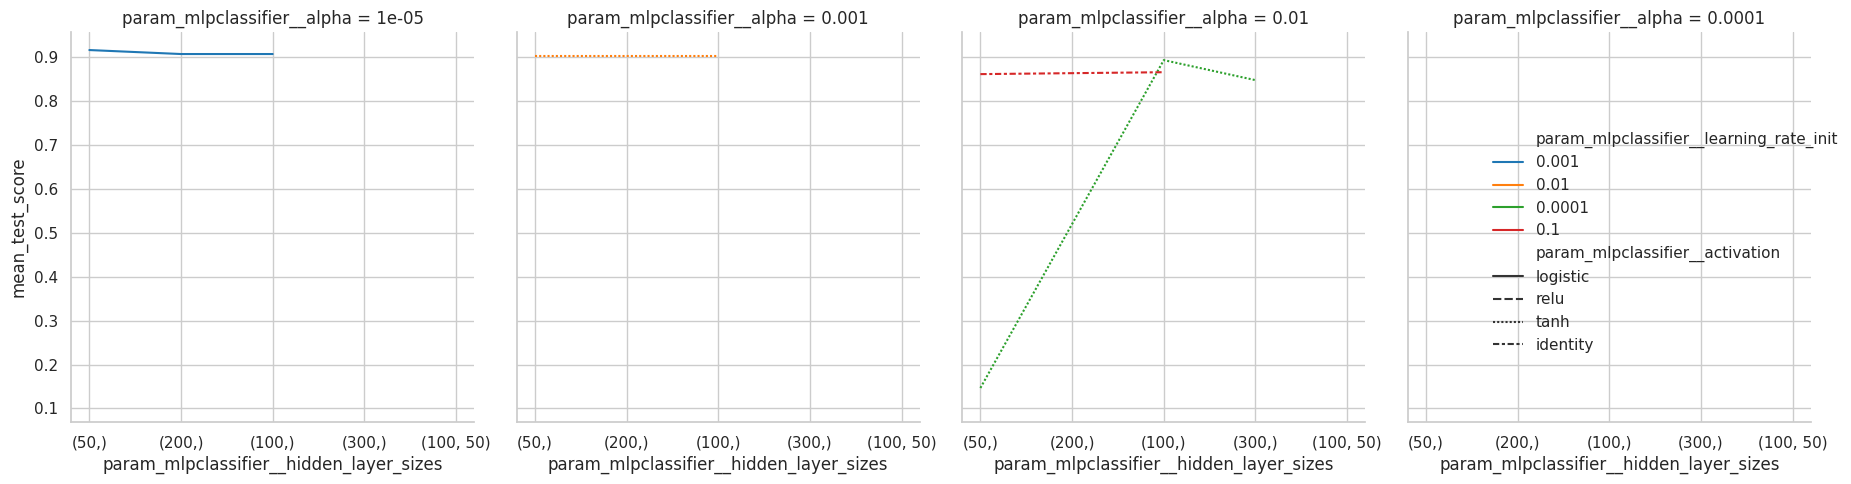

In [25]:
# Convertir columnas con objetos no ploteables a string para graficar
results_df["param_mlpclassifier__hidden_layer_sizes"] = results_df["param_mlpclassifier__hidden_layer_sizes"].astype(str)
results_df["param_mlpclassifier__learning_rate_init"] = results_df["param_mlpclassifier__learning_rate_init"].astype(str)
results_df["param_mlpclassifier__activation"] = results_df["param_mlpclassifier__activation"].astype(str)
results_df["param_mlpclassifier__alpha"] = results_df["param_mlpclassifier__alpha"].astype(str)

# Graficar usando seaborn.relplot con columnas por tipo de activación
sns.set(style="whitegrid")
g = sns.relplot(
    data=results_df,
    x="param_mlpclassifier__hidden_layer_sizes", y="mean_test_score",
    hue="param_mlpclassifier__learning_rate_init", style="param_mlpclassifier__activation", col="param_mlpclassifier__alpha",
    kind="line", palette="tab10",
    height=5, aspect=0.75
)
plt.tight_layout()
random_search.best_params_

## Problema de regresión: detección de humedad
<a name="reg"></a>

Vamos a tratar el problema de detección de humedad como un problema de regresión.

En este caso el modelo va a devolver un valor predicho $\hat y$ continuo que podemos **acotar y redondear** al entero más cercano.

### 🧩 1. ¿Qué es una regresión acotada?

En una regresión normal, el modelo predice valores continuos en un rango indefinido, como $(-\infty, \infty)$. Pero en muchos casos, **sabemos de antemano que la variable a predecir está dentro de ciertos límites**.

#### 🧪 Ejemplo:

En nuestro caso, queremos predecir la **humedad**, y sabemos que solo toma valores entre **10 y 16** (quizá por discretización previa o límites físicos del sensor).


### 🎯 2. ¿Cómo forzar la salida del modelo a un rango?

La forma más elegante en una red neuronal es usar una **función de activación en la salida** que esté acotada, y luego **escalar** esa salida al rango deseado.

#### 🔁 Función sigmoide:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \in (0, 1)
$$

Si la salida del modelo pasa por una `sigmoid`, entonces está en $(0, 1)$. Para transformarla al rango $[a, b]$, usamos:

$$
y = a + (b - a) \cdot \sigma(x)
$$


### 📐 3. Aplicado al problema de humedad $[10, 16]$

Para transformar la salida a $[10, 16]$, simplemente usamos:

```python
Lambda(lambda x: 10 + 6 * sigmoid(x))
```

Donde:

* `10` es el límite inferior
* `6` es la amplitud del rango: $16 - 10 = 6$
* `sigmoid(x)` asegura que el resultado final esté en $[10, 16]$


### 🧱 4. Arquitectura del modelo con Keras

Ahora sí, el código completo con comentarios:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Definir modelo de regresión acotada
def build_model():
    model = Sequential([
        # Capa oculta 1: 512 neuronas con ReLU
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),

        # Capa oculta 2: 256 neuronas con ReLU
        Dense(256, activation='relu'),

        # Capa de salida: un solo valor (regresión)
        Dense(1),

        # Lambda: transforma la salida al rango [10, 16] usando sigmoide
        Lambda(lambda x: 10 + 6 * K.sigmoid(x))
    ])

    # Compilación del modelo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',     # Error cuadrático medio, típico en regresión
        metrics=['mae'] # Error absoluto medio, más interpretable
    )

    return model
```


### ⚙️ 5. Entrenamiento

```python
model = build_model()

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,   # 10% para validación
    epochs=50,
    batch_size=32,
    verbose=1               # Cambia a 0 si no quieres ver la barra de progreso
)
```

### 📊 6. Evaluación y redondeo

Para evaluar el modelo como clasificación (ya que la humedad son enteros 10–16):

```python
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predicción
y_pred = model.predict(X_test_scaled)
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 10, 16)

# Evaluación como clasificación
print(classification_report(y_test, y_pred_rounded))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rounded, labels=range(10, 17)).plot()
```

### 📌 Conclusión

Este enfoque permite:

✅ Modelar una regresión con salidas **estrictamente dentro de un rango**
✅ Usar una red neuronal para capturar relaciones no lineales
✅ Interpretar y evaluar el modelo también como un **clasificador discreto** si lo deseas
✅ Evitar el uso de `clip()` o `if` innecesarios

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
RMSE: 0.3409090909090909
R2 score: 0.9067796610169492


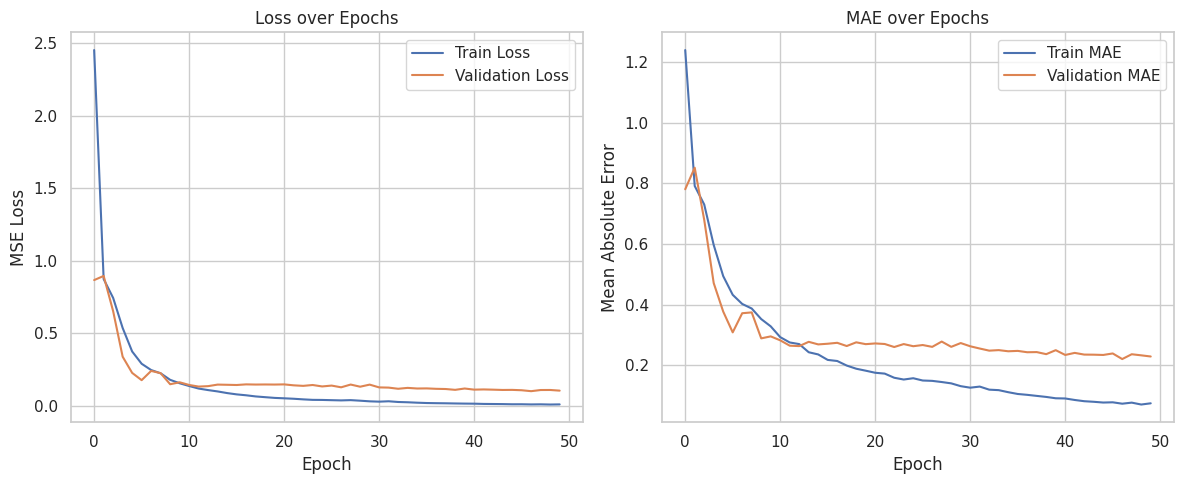

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data['humidity'] = data['humidity'].astype(int)

X = data.drop(columns='humidity')
y = data['humidity']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def build_model():
    model = Sequential([
        # First hidden layer with 256 neurons and ReLU
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),

        # Second hidden layer
        Dense(256, activation='relu'),

        # Output layer
        Dense(1),

        # Lambda layer using sigmoid to ensure output ∈ (10, 16)
        Lambda(lambda x: 10 + 6 * K.sigmoid(x))  # Output bounded in [10, 16]
    ])
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# Build and train
model = build_model()
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=0)

# Predict and round to valid integers
y_pred = model.predict(X_test_scaled)
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 10, 16)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", mean_squared_error(y_test, y_pred_rounded))
print("R2 score:", r2_score(y_test, y_pred_rounded))

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()

In [27]:
reg_results = pd.DataFrame({'Observed humidity': y_test,
                            'Predicted humidity': y_pred.flatten(),
                            'Rounded humidity': y_pred_rounded.flatten()})
reg_results.describe()

,Observed humidity,Predicted humidity,Rounded humidity
count,44.000000,44.000000,44.000000
mean,13.454545,13.516138,13.477273
std,1.934444,1.810006,1.836182
min,10.000000,10.073403,10.000000
25%,12.000000,12.081210,12.000000
50%,14.000000,14.015269,14.000000
75%,15.000000,15.073646,15.000000
max,16.000000,15.997149,16.000000


<Axes: xlabel='Observed humidity', ylabel='Predicted humidity'>

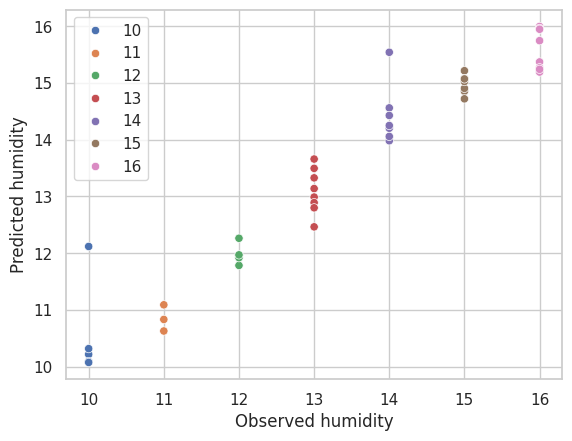

In [28]:
sns.scatterplot(data=reg_results, x="Observed humidity",
                y='Predicted humidity',
                hue=pd.Categorical(reg_results['Observed humidity']))

- Nuestro modelo RF, parece acotar la salida predicha $\hat y$ dentro de los límites de nuestro problema.

Classification Report:

              precision    recall  f1-score   support

          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         3
          12       0.71      1.00      0.83         5
          13       1.00      0.75      0.86         8
          14       0.86      0.75      0.80         8
          15       0.58      1.00      0.74         7
          16       0.80      0.50      0.62         8

    accuracy                           0.80        44
   macro avg       0.85      0.83      0.82        44
weighted avg       0.84      0.80      0.79        44



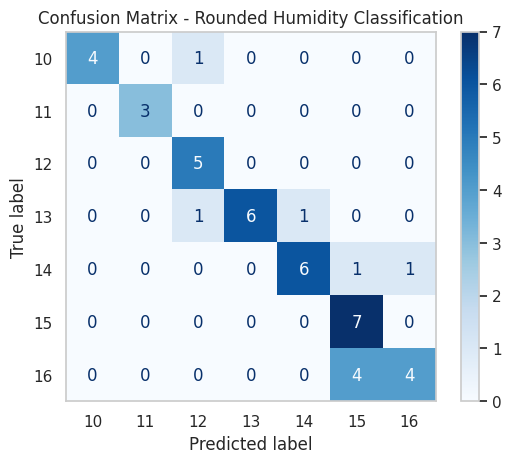

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Round and clip predictions (if not already done)
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 10, 16)

# Labels: valid humidity levels
labels = list(range(10, 17))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded, labels=labels)

# Display nicely with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=0)
plt.title('Confusion Matrix - Rounded Humidity Classification')
plt.grid(False)

# Optional: print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rounded, labels=labels))

## 🔄 Validación cruzada de 5 folds

La **validación cruzada (Cross Validation)** es una técnica que permite evaluar un modelo de forma **más robusta** al usar **diferentes particiones del conjunto de datos**. En el caso de **5 folds**, seguimos este proceso:

### 🔢 Proceso:

1. Dividimos los datos en **5 subconjuntos (folds)** aproximadamente del mismo tamaño.
2. Durante cada iteración:

   * Usamos **4 folds para entrenar** el modelo.
   * Usamos el **fold restante para evaluar**.
3. Repetimos esto **5 veces**, rotando el fold de prueba cada vez.
4. Al final, **promediamos las métricas** de las 5 pruebas para tener una estimación más estable del desempeño del modelo.


### 🧠 ¿Por qué usarlo?

✅ Reduce la posibilidad de que el modelo solo funcione bien por casualidad en una división específica.
✅ Aumenta la **validez estadística** de tus métricas (ej. accuracy, RMSE, R²).
✅ Útil especialmente cuando **no tienes demasiados datos**.


### 🤖 Aplicado a nuestro modelo de humedad

En este caso, el modelo:

* Es una **red neuronal de regresión profunda (Keras)**.
* Produce predicciones continuas **acotadas entre 10 y 16** usando una `sigmoid` escalada.
* Se evalúa como clasificación: redondeando y comparando con los valores reales (también enteros 10 a 16).


### 🧱 ¿Qué sucede en cada fold?

Para cada uno de los 5 folds:

1. **Se entrena un modelo nuevo desde cero** sobre el 80% de los datos.
2. Se predice sobre el 20% restante.
3. Se **redondean** las predicciones al entero más cercano y se **acotan** en \[10, 16].
4. Se calcula el **accuracy** como si fuera un problema de clasificación:

   $$
   \text{accuracy} = \frac{\text{predicciones correctas}}{\text{total de predicciones}}
   $$
5. Se guarda el valor de accuracy para ese fold.


### 📊 ¿Qué obtenemos al final?

Una lista como esta:

```text
Fold 1: Accuracy = 0.78
Fold 2: Accuracy = 0.75
Fold 3: Accuracy = 0.77
Fold 4: Accuracy = 0.76
Fold 5: Accuracy = 0.80

Promedio: 0.772 ± 0.018
```

Este promedio nos da una medida más **generalizable** del rendimiento del modelo que una sola corrida con `train_test_split`.

### 🎯 Conclusión

La validación cruzada te permite:

* Evaluar de forma **justa y equilibrada**
* Evitar **sobreajuste a una partición específica**
* Obtener una mejor estimación del rendimiento **real** del modelo

Y como nuestro modelo está acotado (bounded regression), usar validación cruzada + rounding te permite obtener métricas de **clasificación** aunque el modelo sea regresivo.

## Dropout
<a name="drop"></a>


### 🧠 ¿Qué es `Dropout`?

`Dropout` es una técnica de **regularización** para redes neuronales profundas. Durante el entrenamiento, desactiva aleatoriamente un porcentaje de neuronas en cada capa en cada paso de entrenamiento.


### 🎯 ¿Por qué usar `Dropout`?

| Problema                        | ¿Cómo ayuda Dropout?                                                                 |
| ------------------------------- | ------------------------------------------------------------------------------------ |
| **Sobreajuste (overfitting)**   | Evita que la red aprenda "de memoria" el conjunto de entrenamiento                   |
| **Alta complejidad del modelo** | Fuerza al modelo a ser más robusto al impedir que dependa de rutas específicas       |
| **Poca generalización**         | Promueve la combinación de múltiples subredes, mejorando la capacidad de generalizar |
| **Redes muy profundas**         | Las redes grandes tienden a sobreajustar; Dropout es simple y efectivo               |


### ⚙️ ¿Cómo funciona?

Durante el entrenamiento:

* Se "apagan" aleatoriamente neuronas con una probabilidad `p` (por ejemplo, `p = 0.3`)
* Esto implica que la red se entrena con distintas "subredes" en cada batch
* En inferencia (predicción), no se aplica Dropout, pero se ajusta el escalado de activaciones automáticamente


### ✅ Beneficios clave

* **Mejora la generalización**
* **Reduce la coadaptación** entre neuronas
* **Es simple de implementar**
* **Compatible con otros métodos de regularización** (`early stopping`, `L2`, etc.)

### 📌 Ejemplo en Keras

```python
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),  # Desactiva el 30% de las neuronas durante entrenamiento
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
```

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dropout

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data['humidity'] = data['humidity'].astype(int)

X = data.drop(columns='humidity').to_numpy()
y = data['humidity'].to_numpy()

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

fold = 1
for train_index, test_index in kf.split(X):
    print(f"\n🔁 Fold {fold}")

    # Split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define model
    def build_model():
        model = Sequential([
            Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.3),  # Apaga el 30% de las neuronas aleatoriamente
            Dense(256, activation='relu'),
            Dropout(0.3),
            Dense(1),
            Lambda(lambda x: 10 + 6 * K.sigmoid(x))  # Output in [10, 16]
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
        return model

    # Train
    model = build_model()
    model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=0)

    # Predict and round
    y_pred = model.predict(X_test_scaled)
    y_pred_rounded = np.round(y_pred).astype(int)
    y_pred_rounded = np.clip(y_pred_rounded, 10, 16)

    # Accuracy as classification
    acc = accuracy_score(y_test, y_pred_rounded)
    accuracy_scores.append(acc)
    print(f"✅ Accuracy: {acc:.3f}")

    fold += 1

# Summary
print("\n📊 Accuracy from 5-fold cross-validation:")
for i, acc in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {acc:.3f}")
print(f"\n🔎 Mean Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")


🔁 Fold 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
✅ Accuracy: 0.818

🔁 Fold 2


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
✅ Accuracy: 0.977

🔁 Fold 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
✅ Accuracy: 0.727

🔁 Fold 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
✅ Accuracy: 0.860

🔁 Fold 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
✅ Accuracy: 0.744

📊 Accuracy from 5-fold cross-validation:
Fold 1: 0.818
Fold 2: 0.977
Fold 3: 0.727
Fold 4: 0.860
Fold 5: 0.744

🔎 Mean Accuracy: 0.825 ± 0.090


- Recordemos que nuestra búsqueda de rejilla está maximixando un MSE negativo.
  - Nosotros queremos el valor absoluto de este valor.

🎯 Accuracy por fold: [0.93181818 0.95454545 0.97727273 0.88372093 0.90697674]
📊 Accuracy promedio: 0.931 ± 0.033


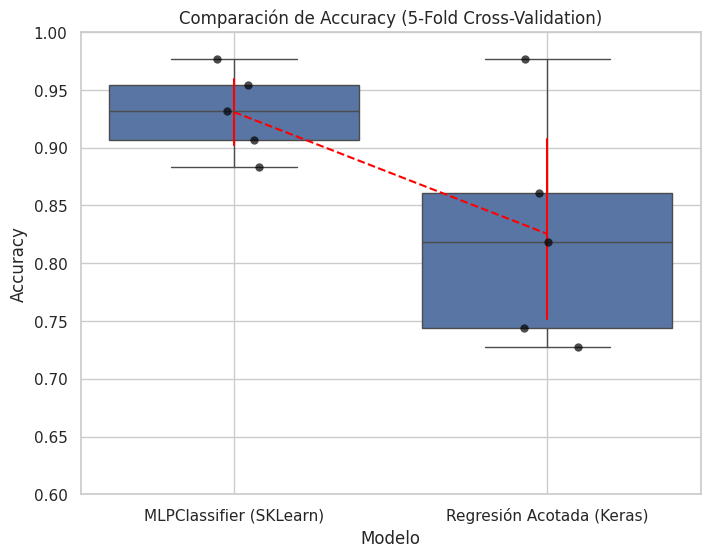

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Cargar y preparar los datos
# -------------------------------
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')

# Asegurarse de que la etiqueta sea categórica (str o int para clasificación)
data['humidity'] = data['humidity'].astype(str)

# Separar características y etiquetas
X = data.drop(columns='humidity')
y = data['humidity']

# -------------------------------
# 2. Definir el mejor modelo MLP
# -------------------------------
best_MLP_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        activation='relu',
        alpha=0.0001,
        hidden_layer_sizes=(100,),
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42
    )
)

# -------------------------------
# 3. Validación cruzada (5 folds)
# -------------------------------
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar accuracy por fold
scores_class = cross_val_score(best_MLP_pipeline, X, y, cv=cv_method, scoring='accuracy')

# -------------------------------
# 4. Resultados
# -------------------------------
print("🎯 Accuracy por fold:", scores_class)
print(f"📊 Accuracy promedio: {scores_class.mean():.3f} ± {scores_class.std():.3f}")

# -------------------------------
# 5. Visualización
# -------------------------------
# Crear DataFrame largo para comparar
df_compare = pd.DataFrame({
    'Accuracy': np.concatenate([scores_class, accuracy_scores]),
    'Modelo': ['MLPClassifier (SKLearn)'] * len(scores_class) + ['Regresión Acotada (Keras)'] * len(accuracy_scores)
})

# Boxplot comparativo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Modelo', y='Accuracy', data=df_compare)
sns.stripplot(x='Modelo', y='Accuracy', data=df_compare, color='black', size=6, jitter=True, alpha=0.7)
sns.lineplot(x='Modelo', y='Accuracy', data=df_compare, linestyle='--', color='red', err_style='bars')
plt.title("Comparación de Accuracy (5-Fold Cross-Validation)")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.show()

In [32]:
df_compare.groupby('Modelo').describe()

Accuracy                                          \
                             count      mean       std       min       25%   
Modelo                                                                       
MLPClassifier (SKLearn)        5.0  0.930867  0.037110  0.883721  0.906977   
Regresión Acotada (Keras)      5.0  0.825476  0.100712  0.727273  0.744186   

                                                         
                                50%       75%       max  
Modelo                                                   
MLPClassifier (SKLearn)    0.931818  0.954545  0.977273  
Regresión Acotada (Keras)  0.818182  0.860465  0.977273

### 📊 Comparación: Clasificador MLP (Scikit-learn) vs. Regresión Acotada (Keras)

| Característica                                  | MLPClassifier (Scikit-learn)       | Regresión Acotada (Keras)                              |
| ----------------------------------------------- | ---------------------------------- | ------------------------------------------------------ |
| **Tipo de modelo**                              | Clasificación directa              | Regresión continua acotada                             |
| **Salida del modelo**                           | Clases discretas (10 a 16)         | Valores continuos en \[10, 16]                         |
| **Métrica optimizada durante el entrenamiento** | `accuracy` implícitamente          | `mse` (error cuadrático medio)                         |
| **Precisión promedio (5 folds)**                | \~0.93                             | \~0.83                                                 |
| **Estabilidad entre folds**                     | Alta (baja dispersión)             | Baja (mayor variabilidad)                              |
| **Ventaja principal**                           | Mejor para predecir clases exactas | Útil si interesa el valor numérico real                |
| **Desventaja principal**                        | No da predicción numérica continua | No optimiza directamente la clasificación              |
| **Adecuado para...**                            | Problemas de clasificación clara   | Problemas de predicción continua con límites conocidos |


### ✅ Recomendación

* Si el objetivo principal es **predecir la clase de humedad exacta**, el modelo **`MLPClassifier` es superior** por precisión y estabilidad.
* Si en cambio necesitas **predecir valores intermedios o tratar el problema como regresión**, el modelo de **regresión acotada es útil**, aunque requiere cuidado si se evalúa como clasificación.

- Ajustar un regresor es más difícil que ajustar un clasificador.

**ML tutorials from www.featureranking.com**

- [Data Preparation for Predictive Modeling](https://marsgr6.github.io/presentations/Data_Preparation_for_Predictive_Modeling.html#/)
- [SK Part 0: Introduction to Predictive Modeling with Python and Scikit-Learn](https://marsgr6.github.io/presentations/SK_Part_0_Introduction_to_Predictive_Modeling_with_Python_and_Scikit-Learn.html#/)
- [SK Part 1: Basic Modeling](https://marsgr6.github.io/presentations/SK_Part_1_Basic_Modeling.html#/)
- [SK Part 2: Feature Selection and Ranking](https://marsgr6.github.io/presentations/SK_Part_2_Feature_Selection_and_Ranking.html#/)
- [SK Part 3: Model Evaluation](https://marsgr6.github.io/presentations/SK_Part_3_Model_Evaluation.html#/)
- [SK Part 4: Cross-Validation and Hyperparameter Tuning](https://marsgr6.github.io/presentations/SK_Part_4_Cross-Validation_and_Hyperparameter_Tuning.html#/)
- [SK Part 5: Advanced Topics, Pipelines, Statistical Model Comparison, and Model Deployment](https://marsgr6.github.io/presentations/SKPart_5_Advanced_Topics_Pipelines_Statistical_Model_Comparison_and_Model_Deployment.html#/)
- [SK Part 6: Clustering](https://marsgr6.github.io/presentations/SK_Part_6_Clustering.html#/)
- [SK Part 7: Neural Networks - A Simple Case Study](https://marsgr6.github.io/presentations/SK_Part_7_Neural_Networks_A_Simple_Case_Study.html#/)
- [Case Study: Predicting Income Status](https://marsgr6.github.io/presentations/Case_Study_Predicting_Income_Status.html#/)